In [10]:
import numpy as np
!pip install tensorflow
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load cleaned CSV for a selected stock
df = pd.read_csv('../data_cleaned/AAPL_prices.csv')
print(df.head())  # Verify loaded data


         Date     Close      High       Low      Open       Volume    Return  \
0  2010-03-16  6.738016  6.753926  6.679777  6.729910  446908000.0  0.002725   
1  2010-03-17  6.728109  6.798055  6.702592  6.751524  450956800.0 -0.001470   
2  2010-03-18  6.744020  6.754527  6.682779  6.727509  342109600.0  0.002365   
3  2010-03-19  6.671971  6.761732  6.641351  6.748223  559445600.0 -0.010683   
4  2010-03-22  6.747021  6.784547  6.608929  6.618535  456419600.0  0.011249   

       MA10      MA50  
0  6.623398  6.212885  
1  6.667798  6.218955  
2  6.709646  6.225122  
3  6.719553  6.231894  
4  6.736574  6.240402  


In [11]:
print(df.head()) 


         Date     Close      High       Low      Open       Volume    Return  \
0  2010-03-16  6.738016  6.753926  6.679777  6.729910  446908000.0  0.002725   
1  2010-03-17  6.728109  6.798055  6.702592  6.751524  450956800.0 -0.001470   
2  2010-03-18  6.744020  6.754527  6.682779  6.727509  342109600.0  0.002365   
3  2010-03-19  6.671971  6.761732  6.641351  6.748223  559445600.0 -0.010683   
4  2010-03-22  6.747021  6.784547  6.608929  6.618535  456419600.0  0.011249   

       MA10      MA50  
0  6.623398  6.212885  
1  6.667798  6.218955  
2  6.709646  6.225122  
3  6.719553  6.231894  
4  6.736574  6.240402  


In [12]:
features = ['Close', 'MA10', 'MA50', 'Return']

# Drop rows with NaN in these features (safety)
df = df.dropna(subset=features)

# Scale features between 0 and 1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[features])


In [13]:
SEQ_LENGTH = 10  # Number of past days used for prediction

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length][0])  # Target is next day's Close (first column)
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, SEQ_LENGTH)

print(f"Input data shape: {X.shape}")  # Expect (samples, seq_length, features)
print(f"Target data shape: {y.shape}") # Expect (samples,)


Input data shape: (3870, 10, 4)
Target data shape: (3870,)


In [14]:
# Split as 80% training, 20% testing
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training samples: {X_train.shape}")
print(f"Testing samples: {X_test.shape}")


Training samples: (3096, 10, 4)
Testing samples: (774, 10, 4)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for regression (tomorrow's Close price)

# Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5674e-04 - val_loss: 0.0012
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2488e-04 - val_loss: 0.0012
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5313e-05 - val_loss: 6.4937e-04
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.2480e-05 - val_loss: 5.9652e-04
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.0712e-05 - val_loss: 4.6540e-04
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6578e-05 - val_loss: 3.6475e-04
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5884e-05 - val_loss: 3.3241e-04
Epoch 9/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.1322e-05 - val_loss: 4.1330e-04
Epoch 10/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.8165e-05 - val_loss: 7.0699e-04
Epoch 11/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.3476e-05 - val_loss: 3.8601e-04
Ep

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test MAE: 0.0134
Test R²: 0.9760


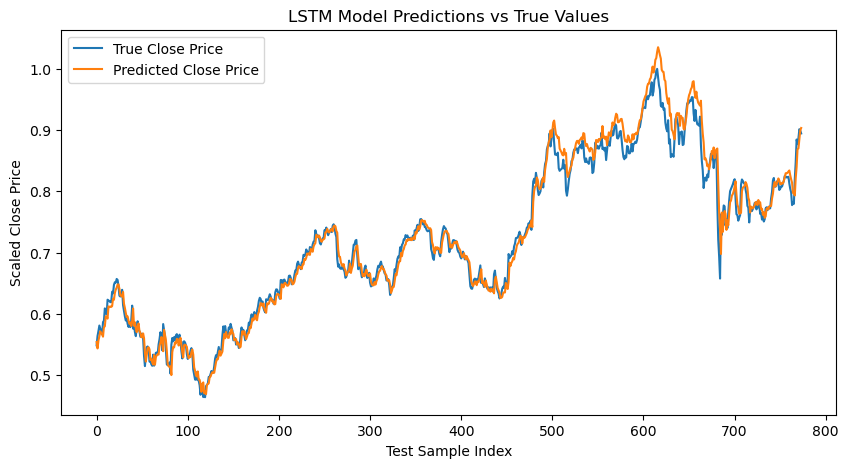

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test data
y_pred = model.predict(X_test).flatten()

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

# Optional: Plot true vs predicted Close prices
plt.figure(figsize=(10,5))
plt.plot(y_test, label='True Close Price')
plt.plot(y_pred, label='Predicted Close Price')
plt.title('LSTM Model Predictions vs True Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Scaled Close Price')
plt.legend()
plt.show()


In [27]:
SEQ_LEN = 10  # Ensure sequence length is defined

last_seq = scaled_features[-SEQ_LEN:]
last_seq = last_seq.reshape(1, SEQ_LEN, len(features))

pred_scaled = model.predict(last_seq)  # Predicted value in scaled space

# --- Manual inverse transform for Close price only (feature index 0) ---
close_index = 0  # assuming 'Close' is the first feature
data_min = scaler.data_min_[close_index]
data_max = scaler.data_max_[close_index]

pred_real_close = pred_scaled[0][0] * (data_max - data_min) + data_min

print(f"Predicted Close price for tomorrow: {pred_real_close:.2f}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Close price for tomorrow: 234.40


In [28]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import joblib

# Define folders
DATA_FOLDER = '../data_cleaned'   # folder where your cleaned stock CSVs reside
MODEL_FOLDER = '../ml/models'     # folder where models will be saved

# Create model folder if it doesn't exist
os.makedirs(MODEL_FOLDER, exist_ok=True)


In [29]:
# Sequence length—how many past days the model looks at to predict the next day's price
SEQ_LEN = 10

def create_sequences(data, seq_length=SEQ_LEN):
    """
    Creates sequences and corresponding targets for LSTM.
    
    Args:
        data (numpy.ndarray): Scaled feature data (num_samples, num_features)
        seq_length (int): Number of past days in each input sequence
        
    Returns:
        X (numpy.ndarray): Input features shaped (num_sequences, seq_length, num_features)
        y (numpy.ndarray): Targets shaped (num_sequences,)
    """
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])          # sequence of feature vectors
        y.append(data[i + seq_length][0])         # target is 'Close' price (feature index 0)
    return np.array(X), np.array(y)


In [30]:
def train_stock_model(filepath):
    """
    Train and save LSTM model for a single stock from CSV filepath.
    
    Args:
        filepath (str): Path to the cleaned CSV file for one stock.
    """
    print(f"Training model for {filepath} ...")
    
    # Load the data
    df = pd.read_csv(filepath)
    
    # Features to use
    features = ['Close', 'MA10', 'MA50', 'Return']
    
    # Drop rows with missing data in features
    df = df.dropna(subset=features)
    
    # Scale features
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(df[features])
    
    # Create sequences and targets
    X, y = create_sequences(scaled_features)
    
    # Split train and test sets (80% train, 20% test)
    split_index = int(0.8 * len(X))
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    # Build LSTM model architecture
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(SEQ_LEN, len(features))))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # Train model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    
    # Extract stock ticker name from file basename
    ticker = os.path.basename(filepath).split('_')[0]
    
    # Save model and scaler
    model.save(os.path.join(MODEL_FOLDER, f"{ticker}_lstm_model.h5"))
    joblib.dump(scaler, os.path.join(MODEL_FOLDER, f"{ticker}_scaler.save"))
    
    print(f"Model training complete and saved for ticker: {ticker}")


In [31]:
def main():
    # List all CSV files in the cleaned data folder
    stock_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith('.csv')]
    
    print(f"Found {len(stock_files)} stock files to train on.")
    
    for file in stock_files:
        filepath = os.path.join(DATA_FOLDER, file)
        try:
            train_stock_model(filepath)
        except Exception as e:
            print(f"Error while training for {file}: {e}")

if __name__ == '__main__':
    main()


Found 230 stock files to train on.
Training model for ../data_cleaned\AAAA_prices.csv ...
Error while training for AAAA_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\AAAU_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAAU
Training model for ../data_cleaned\AAA_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAA
Training model for ../data_cleaned\AACB_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AACB
Training model for ../data_cleaned\AACG_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AACG
Training model for ../data_cleaned\AACIU_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:164: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AACIU
Training model for ../data_cleaned\AACI_prices.csv ...
Error while training for AACI_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\AADR_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AADR
Training model for ../data_cleaned\AALG_prices.csv ...
Error while training for AALG_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\AAL_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAL
Training model for ../data_cleaned\AAME_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAME
Training model for ../data_cleaned\AAMI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAMI
Training model for ../data_cleaned\AAM_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAM
Training model for ../data_cleaned\AAOI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAOI
Training model for ../data_cleaned\AAON_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAON
Training model for ../data_cleaned\AAPB_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPB
Training model for ../data_cleaned\AAPD_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPD
Training model for ../data_cleaned\AAPG_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPG
Training model for ../data_cleaned\AAPL_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPL
Training model for ../data_cleaned\AAPR_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPR
Training model for ../data_cleaned\AAPU_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPU
Training model for ../data_cleaned\AAPW_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPW
Training model for ../data_cleaned\AAPX_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPX
Training model for ../data_cleaned\AAPY_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAPY
Training model for ../data_cleaned\AAP_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAP
Training model for ../data_cleaned\AARD_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AARD
Training model for ../data_cleaned\AAT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAT
Training model for ../data_cleaned\AAUC_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAUC
Training model for ../data_cleaned\AAUS_prices.csv ...
Error while training for AAUS_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\AAVM_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAVM
Training model for ../data_cleaned\AAXJ_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AAXJ
Training model for ../data_cleaned\AA_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AA
Training model for ../data_cleaned\ABAT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABAT
Training model for ../data_cleaned\ABBV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABBV
Training model for ../data_cleaned\ABCB_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABCB
Training model for ../data_cleaned\ABCL_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABCL
Training model for ../data_cleaned\ABCS_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABCS
Training model for ../data_cleaned\ABEO_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABEO
Training model for ../data_cleaned\ABEQ_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABEQ
Training model for ../data_cleaned\ABEV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABEV
Training model for ../data_cleaned\ABFL_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABFL
Training model for ../data_cleaned\ABG_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABG
Training model for ../data_cleaned\ABIG_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABIG
Training model for ../data_cleaned\ABI_prices.csv ...
Error while training for ABI_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\ABLVW_prices.csv ...
Error while training for ABLVW_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\ABLV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABLV
Training model for ../data_cleaned\ABL_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABL
Training model for ../data_cleaned\ABM_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABM
Training model for ../data_cleaned\ABNB_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABNB
Training model for ../data_cleaned\ABNY_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABNY
Training model for ../data_cleaned\ABOS_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABOS
Training model for ../data_cleaned\ABOT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABOT
Training model for ../data_cleaned\ABPWW_prices.csv ...
Error while training for ABPWW_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\ABP_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABP
Training model for ../data_cleaned\ABR_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABR
Training model for ../data_cleaned\ABSI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABSI
Training model for ../data_cleaned\ABTS_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABTS
Training model for ../data_cleaned\ABT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABT
Training model for ../data_cleaned\ABUS_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABUS
Training model for ../data_cleaned\ABVC_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABVC
Training model for ../data_cleaned\ABVEW_prices.csv ...
Error while training for ABVEW_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\ABVE_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABVE
Training model for ../data_cleaned\ABVX_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABVX
Training model for ../data_cleaned\ABXB_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ABXB
Training model for ../data_cleaned\AB_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AB
Training model for ../data_cleaned\ACAD_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACAD
Training model for ../data_cleaned\ACB_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACB
Training model for ../data_cleaned\ACCO_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACCO
Training model for ../data_cleaned\ACCS_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACCS
Training model for ../data_cleaned\ACDC_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACDC
Training model for ../data_cleaned\ACEL_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACEL
Training model for ../data_cleaned\ACES_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACES
Training model for ../data_cleaned\ACET_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACET
Training model for ../data_cleaned\ACFN_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACFN
Training model for ../data_cleaned\ACGLN_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACGLN
Training model for ../data_cleaned\ACGLO_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACGLO
Training model for ../data_cleaned\ACGL_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACGL
Training model for ../data_cleaned\ACGR_prices.csv ...
Error while training for ACGR_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ACGR_prices.csv'
Training model for ../data_cleaned\ACHC_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACHC
Training model for ../data_cleaned\ACHR_prices.csv ...


Model training complete and saved for ticker: ACHR
Training model for ../data_cleaned\ACHV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACHV
Training model for ../data_cleaned\ACIC_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACIC
Training model for ../data_cleaned\ACIO_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACIO
Training model for ../data_cleaned\ACIU_prices.csv ...


Model training complete and saved for ticker: ACIU
Training model for ../data_cleaned\ACIW_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACIW
Training model for ../data_cleaned\ACI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACI
Training model for ../data_cleaned\ACLC_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACLC
Training model for ../data_cleaned\ACLO_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACLO
Training model for ../data_cleaned\ACLS_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACLS
Training model for ../data_cleaned\ACONW_prices.csv ...
Error while training for ACONW_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\ACON_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACON
Training model for ../data_cleaned\ACP_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACP
Training model for ../data_cleaned\ACRE_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACRE
Training model for ../data_cleaned\ACRS_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACRS
Training model for ../data_cleaned\ACRV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACRV
Training model for ../data_cleaned\ACR_prices.csv ...


Model training complete and saved for ticker: ACR
Training model for ../data_cleaned\ACSI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACSI
Training model for ../data_cleaned\ACTG_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACTG
Training model for ../data_cleaned\ACTU_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACTU
Training model for ../data_cleaned\ACTV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACTV
Training model for ../data_cleaned\ACT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACT
Training model for ../data_cleaned\ACU_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACU
Training model for ../data_cleaned\ACVF_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACVF
Training model for ../data_cleaned\ACVT_prices.csv ...
Error while training for ACVT_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ACVT_prices.csv'
Training model for ../data_cleaned\ACWI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACWI
Training model for ../data_cleaned\ACWV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACWV
Training model for ../data_cleaned\ACWX_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACWX
Training model for ../data_cleaned\ACXP_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ACXP
Training model for ../data_cleaned\ADAG_prices.csv ...
Error while training for ADAG_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADAG_prices.csv'
Training model for ../data_cleaned\ADAP_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADAP
Training model for ../data_cleaned\ADBE_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADBE
Training model for ../data_cleaned\ADBG_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADBG
Training model for ../data_cleaned\ADCT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADCT
Training model for ../data_cleaned\ADC_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADC
Training model for ../data_cleaned\ADD_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADD
Training model for ../data_cleaned\ADEA_prices.csv ...
Error while training for ADEA_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADEA_prices.csv'
Training model for ../data_cleaned\ADFI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADFI
Training model for ../data_cleaned\ADGM_prices.csv ...
Error while training for ADGM_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADGM_prices.csv'
Training model for ../data_cleaned\ADIL_prices.csv ...
Error while training for ADIL_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADIL_prices.csv'
Training model for ../data_cleaned\ADIV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADIV
Training model for ../data_cleaned\ADI_prices.csv ...
Error while training for ADI_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADI_prices.csv'
Training model for ../data_cleaned\ADMA_prices.csv ...
Error while training for ADMA_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADMA_prices.csv'
Training model for ../data_cleaned\ADME_prices.csv ...
Error while training for ADME_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADME_prices.csv'
Training model for ../data_cleaned\ADM_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADM
Training model for ../data_cleaned\ADNT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADNT
Training model for ../data_cleaned\ADN_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADN
Training model for ../data_cleaned\ADSEW_prices.csv ...
Error while training for ADSEW_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADSEW_prices.csv'
Training model for ../data_cleaned\ADSE_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADSE
Training model for ../data_cleaned\ADSK_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADSK
Training model for ../data_cleaned\ADTN_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADTN
Training model for ../data_cleaned\ADTX_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADTX
Training model for ../data_cleaned\ADT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADT
Training model for ../data_cleaned\ADUR_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADUR
Training model for ../data_cleaned\ADUS_prices.csv ...
Error while training for ADUS_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADUS_prices.csv'
Training model for ../data_cleaned\ADVB_prices.csv ...
Error while training for ADVB_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADVB_prices.csv'
Training model for ../data_cleaned\ADVE_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADVE
Training model for ../data_cleaned\ADVM_prices.csv ...
Error while training for ADVM_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\ADVM_prices.csv'
Training model for ../data_cleaned\ADVWW_prices.csv ...
Error while training for ADVWW_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\ADV_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADV
Training model for ../data_cleaned\ADXN_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADXN
Training model for ../data_cleaned\ADX_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: ADX
Training model for ../data_cleaned\AD_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AD
Training model for ../data_cleaned\AEBI_prices.csv ...
Error while training for AEBI_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\AEE_prices.csv ...
Error while training for AEE_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AEE_prices.csv'
Training model for ../data_cleaned\AEF_prices.csv ...
Error while training for AEF_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AEF_prices.csv'
Training model for ../data_cleaned\AEHR_prices.csv ...
Error while training for AEHR_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AEHR_prices.csv'
Training model for ../data_cleaned\AEIS_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AEIS
Training model for ../data_cleaned\AEI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AEI
Training model for ../data_cleaned\AEMD_prices.csv ...
Error while training for AEMD_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AEMD_prices.csv'
Training model for ../data_cleaned\AEMS_prices.csv ...
Error while training for AEMS_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AEMS_prices.csv'
Training model for ../data_cleaned\AEM_prices.csv ...
Error while training for AEM_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AEM_prices.csv'
Training model for ../data_cleaned\AENTW_prices.csv ...
Error while training for AENTW_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\AENT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AENT
Training model for ../data_cleaned\AERTW_prices.csv ...
Error while training for AERTW_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AERTW_prices.csv'
Training model for ../data_cleaned\AERT_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AERT
Training model for ../data_cleaned\AER_prices.csv ...
Error while training for AER_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AER_prices.csv'
Training model for ../data_cleaned\AESI_prices.csv ...
Error while training for AESI_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AESI_prices.csv'
Training model for ../data_cleaned\AESR_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AESR
Training model for ../data_cleaned\AES_prices.csv ...
Error while training for AES_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AES_prices.csv'
Training model for ../data_cleaned\AETH_prices.csv ...
Error while training for AETH_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AETH_prices.csv'
Training model for ../data_cleaned\AEVAW_prices.csv ...
Error while training for AEVAW_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\AEVA_prices.csv ...
Error while training for AEVA_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AEVA_prices.csv'
Training model for ../data_cleaned\AEYE_prices.csv ...
Error while training for AEYE_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AEYE_prices.csv'
Training model for ../data_cleaned\AFBI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AFBI
Training model for ../data_cleaned\AFB_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AFB
Training model for ../data_cleaned\AFCG_prices.csv ...
Error while training for AFCG_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFCG_prices.csv'
Training model for ../data_cleaned\AFGB_prices.csv ...
Error while training for AFGB_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFGB_prices.csv'
Training model for ../data_cleaned\AFGC_prices.csv ...
Error while training for AFGC_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFGC_prices.csv'
Training model for ../data_cleaned\AFGD_prices.csv ...
Error while training for AFGD_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFGD_prices.csv'
Training model for ../data_cleaned\AFGE_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AFGE
Training model for ../data_cleaned\AFG_prices.csv ...
Error while training for AFG_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFG_prices.csv'
Training model for ../data_cleaned\AFIF_prices.csv ...
Error while training for AFIF_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFIF_prices.csv'
Training model for ../data_cleaned\AFIX_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AFIX
Training model for ../data_cleaned\AFJKR_prices.csv ...
Error while training for AFJKR_prices.csv: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.
Training model for ../data_cleaned\AFJKU_prices.csv ...
Error while training for AFJKU_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFJKU_prices.csv'
Training model for ../data_cleaned\AFJK_prices.csv ...
Error while training for AFJK_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFJK_prices.csv'
Training model for ../data_cleaned\AFK_prices.csv ...
Error while training for AFK_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFK_prices.csv'
Training model for ../data_cleaned\AFLG_prices.csv ...
Error while training for AFLG_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AFLG_prices.csv'
Training model for ../data_cleaned\AFL_prices.csv ...
Error while training for A

c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AGIO
Training model for ../data_cleaned\AGIX_prices.csv ...
Error while training for AGIX_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGIX_prices.csv'
Training model for ../data_cleaned\AGI_prices.csv ...
Error while training for AGI_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGI_prices.csv'
Training model for ../data_cleaned\AGL_prices.csv ...
Error while training for AGL_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGL_prices.csv'
Training model for ../data_cleaned\AGMH_prices.csv ...
Error while training for AGMH_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGMH_prices.csv'
Training model for ../data_cleaned\AGMI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AGMI
Training model for ../data_cleaned\AGM_prices.csv ...
Error while training for AGM_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGM_prices.csv'
Training model for ../data_cleaned\AGNCL_prices.csv ...
Error while training for AGNCL_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGNCL_prices.csv'
Training model for ../data_cleaned\AGNCM_prices.csv ...
Error while training for AGNCM_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGNCM_prices.csv'
Training model for ../data_cleaned\AGNCN_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AGNCN
Training model for ../data_cleaned\AGNCO_prices.csv ...
Error while training for AGNCO_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGNCO_prices.csv'
Training model for ../data_cleaned\AGNCP_prices.csv ...
Error while training for AGNCP_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGNCP_prices.csv'
Training model for ../data_cleaned\AGNC_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AGNC
Training model for ../data_cleaned\AGNG_prices.csv ...
Error while training for AGNG_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGNG_prices.csv'
Training model for ../data_cleaned\AGOX_prices.csv ...
Error while training for AGOX_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGOX_prices.csv'
Training model for ../data_cleaned\AGO_prices.csv ...
Error while training for AGO_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGO_prices.csv'
Training model for ../data_cleaned\AGQI_prices.csv ...
Error while training for AGQI_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGQI_prices.csv'
Training model for ../data_cleaned\AGQ_prices.csv ...
Error while training for AGQ_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AGQ_prices.csv'
Training model for ../data_cleaned\AGRH_prices.csv ...
Error while training for AGRH_prices.csv: [Errno 2] No 

c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AGYS
Training model for ../data_cleaned\AG_prices.csv ...
Error while training for AG_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AG_prices.csv'
Training model for ../data_cleaned\AHL_prices.csv ...
Error while training for AHL_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AHL_prices.csv'
Training model for ../data_cleaned\AHR_prices.csv ...
Error while training for AHR_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AHR_prices.csv'
Training model for ../data_cleaned\AHYB_prices.csv ...
Error while training for AHYB_prices.csv: [Errno 2] No such file or directory: '../data_cleaned\\AHYB_prices.csv'
Training model for ../data_cleaned\AI_prices.csv ...


c:\Users\Lavanya\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model training complete and saved for ticker: AI
Training model for ../data_cleaned\A_prices.csv ...


Model training complete and saved for ticker: A


In [34]:
from tensorflow.keras.models import load_model
import joblib
import os

MODEL_PATH = '../ml/models/AI_lstm_model.h5'
SCALER_PATH = '../ml/models/AI_scaler.save'

# Ensure the paths are correct relative to your current working directory
print("Current working directory:", os.getcwd())
print("Model exists:", os.path.exists(MODEL_PATH))
print("Scaler exists:", os.path.exists(SCALER_PATH))

model = load_model(MODEL_PATH)
scaler = joblib.load(SCALER_PATH)



Current working directory: d:\Lavanya\WEB DEVELOPMENT\bullbearAI\server\notebooks
Model exists: True
Scaler exists: True
